In [1]:
#Data pre-processed version
#Full metafile data version
#Dependencies
import os
import csv
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from voicedata import voicedata

# Data Manupulation
import numpy as np
import pandas as pd
import math

# Plotting graphs
import matplotlib.pyplot as plt

# Required Sklearn libraries Machine learning libraries
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

#testing model
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, mean_squared_error, r2_score

# Data fetching
#from pandas_datareader import data as pdr

#using python 3.6

Using TensorFlow backend.


KNN stores the entire training dataset which it uses as its representation. Where can use KNN? The data should be smaller and noise-free.
KNN does not learn any model. It is a lazy learner because it does not learn a discriminitive function in the dataset.
KNN makes predictions just-in-time by calculating the similarity between an input sample and each training instance.
There are many distance measures to choose from to match the structure of your input data.
That it is a good idea to rescale your data, such as using normalization, when using KNN.

In [3]:
#Getting data
#df = pd.read_csv("Resources\\voice.csv")
#(X_train, X_test,
#genc, g_train, g_train_enc, g_train_cat, g_test, g_test_enc, g_test_cat,
#nenc, n_train, n_train_enc, n_train_cat, n_test, n_test_enc, n_test_cat,
#ienc, i_train, i_train_enc, i_train_cat, i_test, i_test_enc, i_test_cat) = voicedata()

vtrainfile = 'vtrain_200'
vtestfile  = 'vtest_200'
(X_train, X_test,
genc, g_train, g_train_enc, g_train_cat, g_test, g_test_enc, g_test_cat,
nenc, n_train, n_train_enc, n_train_cat, n_test, n_test_enc, n_test_cat,
ienc, i_train, i_train_enc, i_train_cat, i_test, i_test_enc, i_test_cat) = voicedata(vtrainfile, vtestfile)

#df.head()

(6750, 4)
(2250, 4)


In [4]:
#Check the length of the dataset. This is length of y:
#len(df)
print(X_train.shape) 
print(X_test.shape) 
print(g_train_cat.shape) 
print(g_test_cat.shape) 
print(n_train_cat.shape) 
print(n_test_cat.shape) 
print(i_train_cat.shape) 
print(i_test_cat.shape) 

(6750, 40)
(2250, 40)
(6750, 2)
(2250, 2)
(6750, 17)
(2250, 17)
(6750, 200)
(2250, 200)


Data preprocessing

In [4]:
# Assign X (data) and y (target)
#X = df.drop("label", axis=1)
#y = df["label"]
#print(X.shape, y.shape)


#Dummy encoding
#data = X.copy()
#data_binary_encoded = pd.get_dummies(data, columns=["label"])
#data_binary_encoded.head()
#Dummy Encoding
#data = X.copy()
#data_binary_encoded = pd.get_dummies(data, columns=["gender"], drop_first = True)
#data_binary_encoded.head()

In [5]:
#target = df["Outcome"]
#target_names = ["negative", "positive"]

In [6]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
#len(X_train)
#data = df.drop("Outcome", axis=1)
#feature_names = data.columns
#data.head()

In [7]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

#For slicing data to look at all rows, 0 to 7 columns, test 20%
#x = dataset.iloc[:, 0:8]
##just column 8
#y = dataset.iloc[:, 8]

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [8]:
#plt.hist(df['meanfreq'], bins = 2)
#scalinng data
#sc_x = StandardScalar()
#X_train = sc_X.fit_transorm(X_train)
#X_test = sc_X.transform(X_test)

In [9]:
#plt.hist(df['label'], bins = 2)

How do we choose the factor k? The KNN algorithm is based on feature similarity. Choosing the right k is a process called parameter tuning. It is important to find the better k for the best accuracy. An odd value for k is selected to avoid confusion between two classes of data. Some people use the square root of n where n is the number of data points.

In [5]:
math.sqrt(len(X_train))

82.15838362577492

In [6]:
math.sqrt(len(g_test_cat))

47.43416490252569

In [7]:
math.sqrt(len(n_test_cat))

47.43416490252569

In [8]:
math.sqrt(len(i_test_cat))

47.43416490252569

In [9]:
#Defining the model: Init K-NN
classifier =KNeighborsClassifier(n_neighbors=27, p=2, metric = 'euclidean')
#can also use square means or others instead of euclidean. 
#p = 2 for deciding between 2 states.
#Fit model
#classifier.fit(X_train, y_train)
classifier.fit(X_train, g_train_enc)
y_pred_g = classifier.predict(X_test)
y_pred_g

array([1, 1, 0, ..., 1, 1, 0])

In [10]:
#Defining the model: Init K-NN
classifier =KNeighborsClassifier(n_neighbors=27, p=2, metric = 'euclidean')
#can also use square means or others instead of euclidean. 
#p = 2 for deciding between 2 states.
#Fit model
#classifier.fit(X_train, y_train)
classifier.fit(X_train, n_train_enc)
y_pred_n = classifier.predict(X_test)
y_pred_n

array([16, 16, 16, ..., 16, 16, 16])

In [11]:
#Defining the model: Init K-NN
classifier =KNeighborsClassifier(n_neighbors=27, p=2, metric = 'euclidean')
#can also use square means or others instead of euclidean. 
#p = 2 for deciding between 2 states.
#Fit model
#classifier.fit(X_train, y_train)
classifier.fit(X_train, i_train_enc)
y_pred_i = classifier.predict(X_test)
y_pred_i

array([110,  76,  75, ...,  43, 172,  19])

In [12]:
#Evaluate models
#cm = confusion_matrix(y_test, y_pred)
#print (cm)
cm_g = confusion_matrix(g_test_enc, y_pred_g)
cm_n = confusion_matrix(n_test_enc, y_pred_n)
cm_i = confusion_matrix(i_test_enc, y_pred_i)

In [13]:
print(f1_score(g_test_enc, y_pred_g))  #cannot use this unless change to dummydata or 0s and 1s. Must be binary

0.951434034416826


In [14]:
#What you tell the general public. This one is poor fit in model.
#print(accuracy_score(y_test, y_pred))
print(accuracy_score(g_test_enc, y_pred_g))

0.9435555555555556


In [15]:
print(accuracy_score(n_test_enc, y_pred_n))

0.7217777777777777


In [16]:
print(accuracy_score(i_test_enc, y_pred_i))

0.49955555555555553


k: 2, Train/Test Score: 0.988/0.968
k: 4, Train/Test Score: 0.983/0.968
k: 6, Train/Test Score: 0.977/0.965
k: 8, Train/Test Score: 0.970/0.965
k: 10, Train/Test Score: 0.969/0.961
k: 12, Train/Test Score: 0.964/0.959
k: 14, Train/Test Score: 0.960/0.957
k: 16, Train/Test Score: 0.957/0.955
k: 18, Train/Test Score: 0.955/0.952
k: 20, Train/Test Score: 0.954/0.951


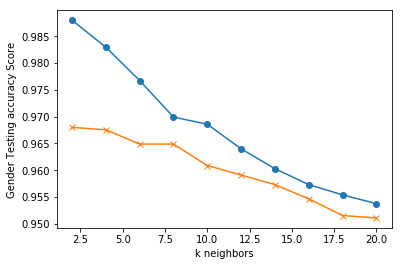

In [17]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(2, 21, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
#    knn.fit(X_train, y_train)
    knn.fit(X_train, g_train_enc)
    train_score = knn.score(X_train, g_train_enc)
    test_score = knn.score(X_test, g_test_enc)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(2, 21, 2), train_scores, marker='o')
plt.plot(range(2, 21, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Gender Testing accuracy Score")
plt.show()

k: 3, Train/Test Score: 0.928/0.835
k: 6, Train/Test Score: 0.887/0.814
k: 9, Train/Test Score: 0.853/0.789
k: 12, Train/Test Score: 0.828/0.776
k: 15, Train/Test Score: 0.808/0.756
k: 18, Train/Test Score: 0.792/0.748
k: 21, Train/Test Score: 0.774/0.740
k: 24, Train/Test Score: 0.760/0.731
k: 27, Train/Test Score: 0.751/0.722
k: 30, Train/Test Score: 0.740/0.717


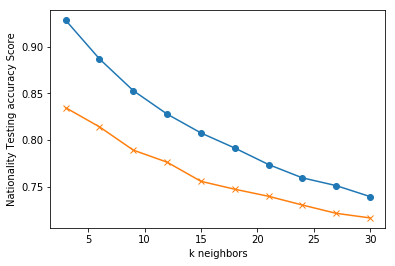

In [18]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(3, 31, 3):
    knn = KNeighborsClassifier(n_neighbors=k)
#    knn.fit(X_train, y_train)
    knn.fit(X_train, n_train_enc)
    train_score = knn.score(X_train, n_train_enc)
    test_score = knn.score(X_test, n_test_enc)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(3, 31, 3), train_scores, marker='o')
plt.plot(range(3, 31, 3), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Nationality Testing accuracy Score")
plt.show()

k: 7, Train/Test Score: 0.764/0.625
k: 14, Train/Test Score: 0.678/0.564
k: 21, Train/Test Score: 0.615/0.521
k: 28, Train/Test Score: 0.577/0.496
k: 35, Train/Test Score: 0.545/0.467
k: 42, Train/Test Score: 0.519/0.452
k: 49, Train/Test Score: 0.499/0.433
k: 56, Train/Test Score: 0.482/0.420
k: 63, Train/Test Score: 0.463/0.412


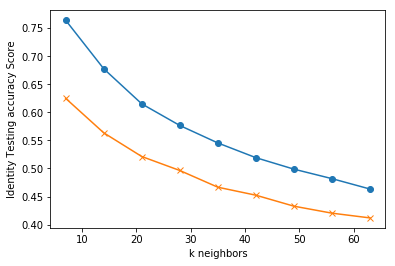

In [19]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(7, 70, 7):
    knn = KNeighborsClassifier(n_neighbors=k)
#    knn.fit(X_train, y_train)
    knn.fit(X_train, i_train_enc)
    train_score = knn.score(X_train, i_train_enc)
    test_score = knn.score(X_test, i_test_enc)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(7, 70, 7), train_scores, marker='o')
plt.plot(range(7, 70, 7), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Identity Testing accuracy Score")
plt.show()

In [20]:
# Note that k: 3 seems to be the best choice for this dataset, but 27 was chosen. Accuracy matched test.
knn = KNeighborsClassifier(n_neighbors=27)
#knn.fit(X_train, y_train)
#print('k=27 Test Acc: %.3f' % knn.score(X_test, y_test))
knn.fit(X_train, g_train_enc)
print('k=2 Test Acc: %.3f' % knn.score(X_test, g_test_enc))

k=2 Test Acc: 0.944


In [21]:
knn.fit(X_train, n_train_enc)
print('k=3 Test Acc: %.3f' % knn.score(X_test, n_test_enc))

k=3 Test Acc: 0.722


In [22]:
knn.fit(X_train, i_train_enc)
print('k=7 Test Acc: %.3f' % knn.score(X_test, i_test_enc))

k=7 Test Acc: 0.500


In [23]:
#calculate MSE gender
predicted = knn.predict(X_test)
#mse = mean_squared_error(y_test, predicted)
mse_g = mean_squared_error(g_test_enc, predicted)
#r2 = r2_score(y_test, predicted)
g_r2 = r2_score(g_test_enc, predicted)
####print(f"Gender Mean squared Error (MSE) : {mse}")
####print(f"Gender R-squared (R2): {r2}")
print(f"Gender R2: {g_r2}")
print(f"Gender Mean squared Error: {mse_g}")

Gender R2: -47218.66942061959
Gender Mean squared Error: 11544.78711111111


In [24]:
#calculate MSE nationality
predicted = knn.predict(X_test)
#mse = mean_squared_error(y_test, predicted)
mse_n = mean_squared_error(n_test_enc, predicted)
#r2 = r2_score(y_test, predicted)
n_r2 = r2_score(n_test_enc, predicted)
####print(f"Gender Mean squared Error (MSE) : {mse}")
####print(f"Gender R-squared (R2): {r2}")
print(f"Nationality R2: {n_r2}")
print(f"Nationality Mean squared Error: {mse_n}")

Nationality R2: -405.1371947886895
Nationality Mean squared Error: 9341.328444444445


In [25]:
#calculate MSE identity
predicted = knn.predict(X_test)
#mse = mean_squared_error(y_test, predicted)
mse_i = mean_squared_error(i_test_enc, predicted)
#r2 = r2_score(y_test, predicted)
i_r2 = r2_score(i_test_enc, predicted)
####print(f"Gender Mean squared Error (MSE) : {mse}")
####print(f"Gender R-squared (R2): {r2}")
print(f"identity R2: {i_r2}")
print(f"identity Mean squared Error: {mse_i}")

identity R2: -0.0061501356490898385
identity Mean squared Error: 3352.407111111111
